In [ ]:
!apt install subversion
!svn checkout https://github.com/mahasiswateladan/myo-project/trunk/dataset

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2 subversion
0 upgraded, 6 newly installed, 0 to remove and 22 not upgraded.
Need to get 2,355 kB of archives.
After this operation, 10.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libapr1 amd64 1.6.5-1ubuntu1 [91.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libaprutil1 amd64 1.6.1-4ubuntu2.1 [84.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libserf-1-1 amd64 1.3.9-8build1 [45.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libutf8proc2 amd64 2.5.0-1 [50.0 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-

## Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Fist Gesture

In [ ]:
df = pd.read_csv("dataset/Raw/P1/G1/P1-fist-T1.csv")
df = df.iloc[:, 1:9]

<function matplotlib.pyplot.show(close=None, block=None)>

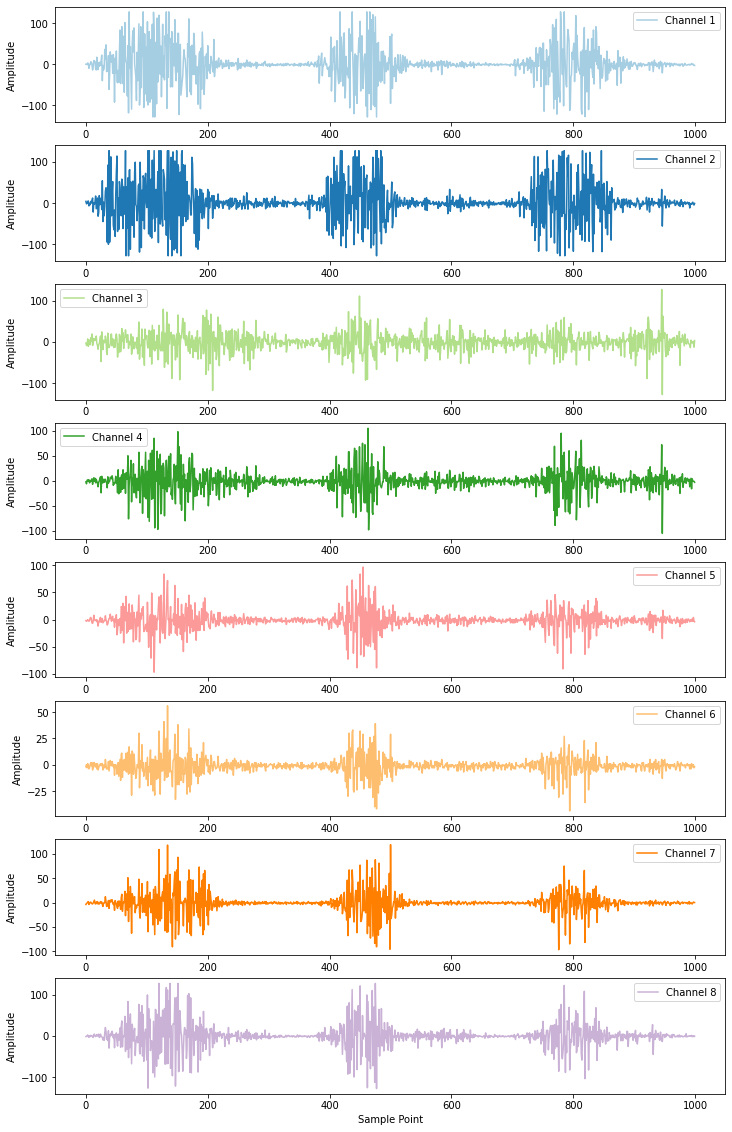

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(12, 20))

channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8']

for i, ax in enumerate(axes.flatten()):
    y = df.iloc[9700:10700, i].values
    ax.plot(y, color = plt.cm.Paired(i/10.), label = channels[i])
    axes[i].set_ylabel('Amplitude')
    plt.xlabel('Sample Point')
    axes[i].legend()

plt.show

### Open Finger

In [ ]:
df = pd.read_csv("dataset/Raw/P1/G2/P1-openfingers-T1.csv")
df = df.iloc[:, 1:9]

<function matplotlib.pyplot.show(close=None, block=None)>

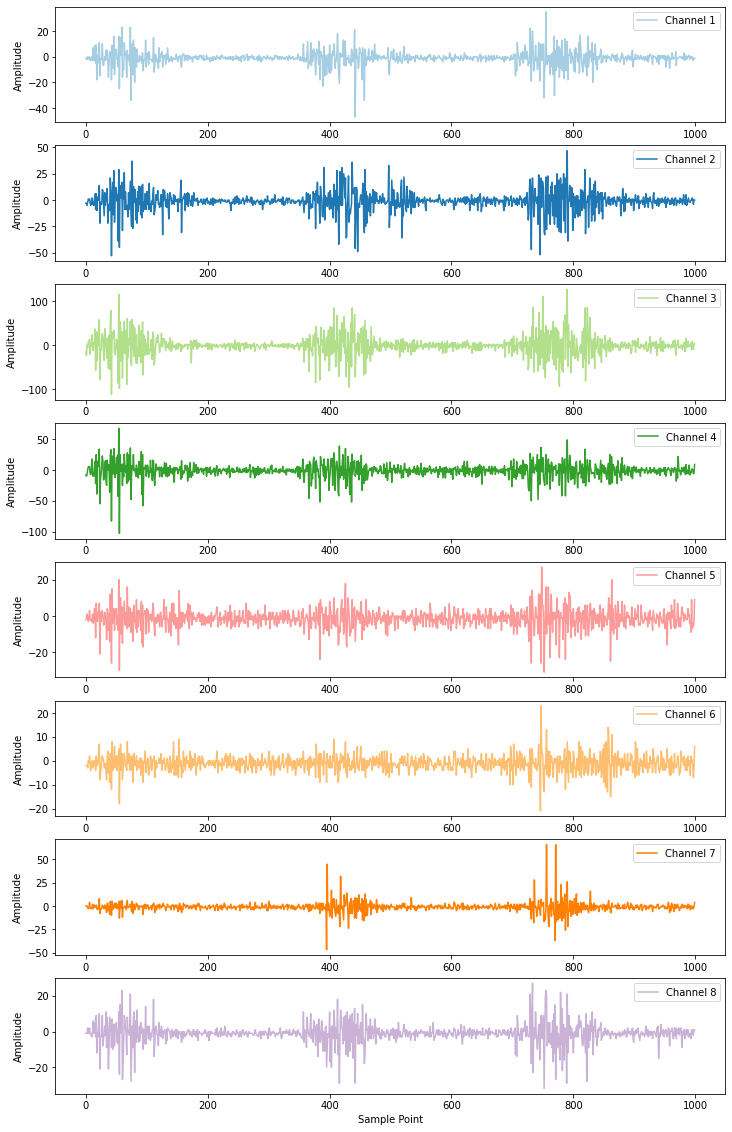

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(12, 20))

channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8']

for i, ax in enumerate(axes.flatten()):
    y = df.iloc[9700:10700, i].values
    ax.plot(y, color = plt.cm.Paired(i/10.), label = channels[i])
    axes[i].set_ylabel('Amplitude')
    plt.xlabel('Sample Point')
    axes[i].legend()

plt.show

### Wavein Gesture

In [ ]:
df = pd.read_csv("dataset/Raw/P1/G3/P1-wavein-T1.csv")
df = df.iloc[:, 1:9]

<function matplotlib.pyplot.show(close=None, block=None)>

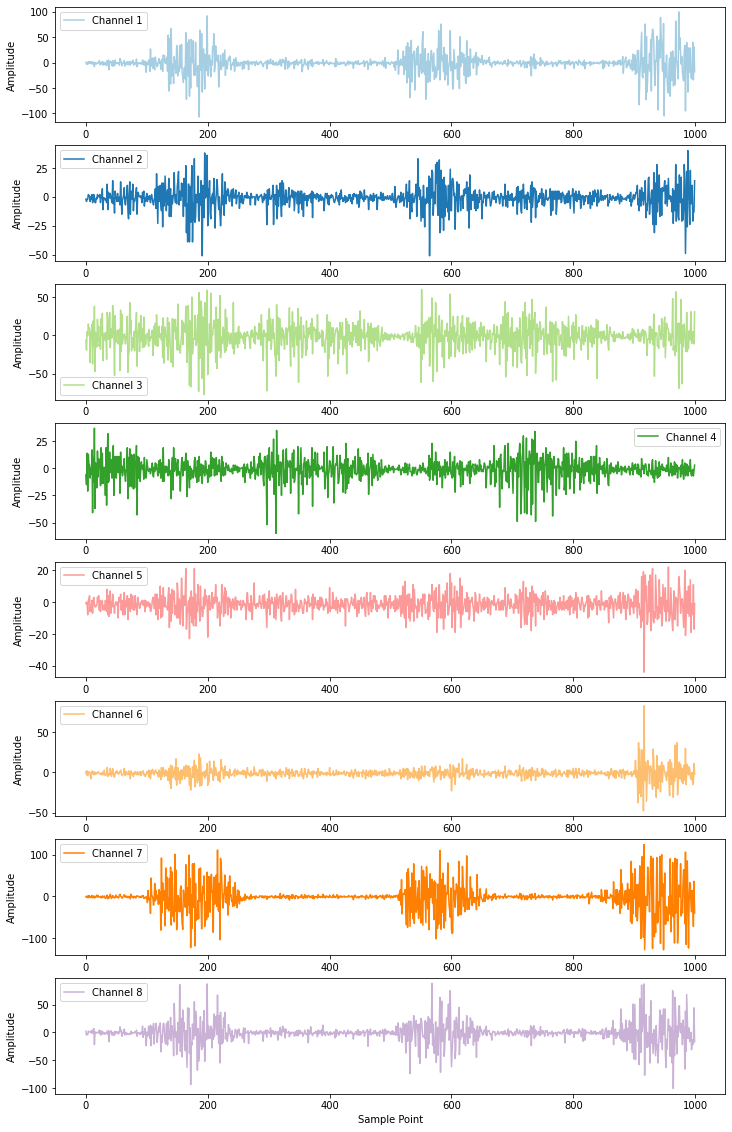

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(12, 20))

channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8']

for i, ax in enumerate(axes.flatten()):
    y = df.iloc[9700:10700, i].values
    ax.plot(y, color = plt.cm.Paired(i/10.), label = channels[i])
    axes[i].set_ylabel('Amplitude')
    plt.xlabel('Sample Point')
    axes[i].legend()

plt.show

### Waveout Gesture

In [ ]:
df = pd.read_csv("dataset/Raw/P1/G4/P1-waveout-T1.csv")
df = df.iloc[:, 1:9]

<function matplotlib.pyplot.show(close=None, block=None)>

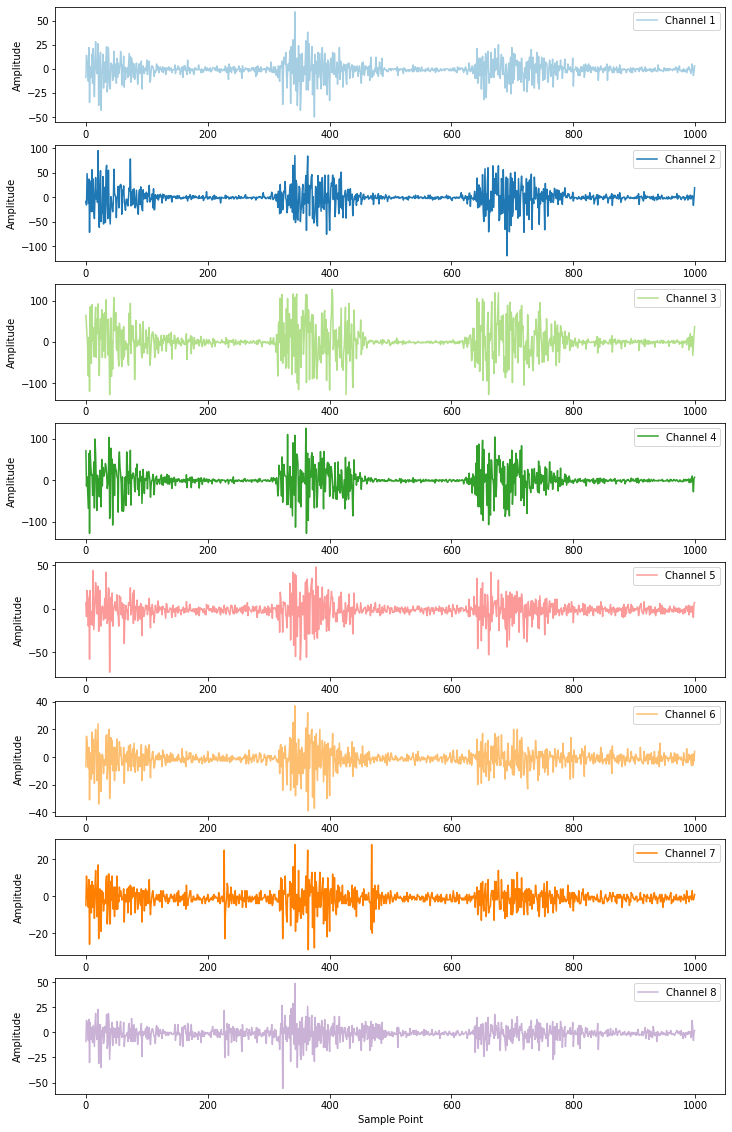

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(12, 20))

channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8']

for i, ax in enumerate(axes.flatten()):
    y = df.iloc[9700:10700, i].values
    ax.plot(y, color = plt.cm.Paired(i/10.), label = channels[i])
    axes[i].set_ylabel('Amplitude')
    plt.xlabel('Sample Point')
    axes[i].legend()

plt.show

## Pre-processing

In [ ]:
import statistics as st
import scipy.stats as scst

In [ ]:
df = pd.read_csv("dataset/Raw/P1/G1/P1-fist-T1.csv")
df = abs(df.iloc[:, 1:9])

(21430, 8)


<function matplotlib.pyplot.show(close=None, block=None)>

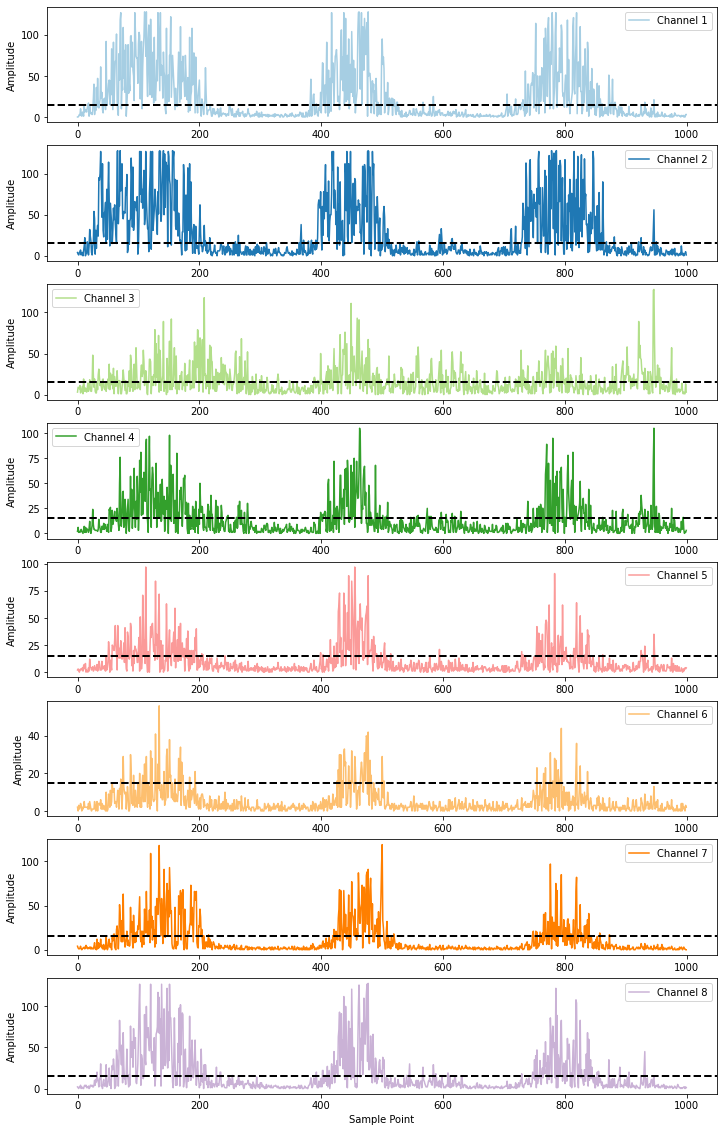

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(12, 20))

channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8']

for i, ax in enumerate(axes.flatten()):
    y = df.iloc[9700:10700, i].values
    ax.plot(y, color = plt.cm.Paired(i/10.), label = channels[i])
    ax.axhline(y=15, color='k',linewidth=2.0, linestyle='--') # potential threshold
    axes[i].set_ylabel('Amplitude')
    plt.xlabel('Sample Point')
    axes[i].legend()
print(df.shape)
plt.show

In [ ]:
import scipy as sc
from scipy.signal import butter, lfilter, filtfilt

In [ ]:
# low-pass Butterworth filter for envelope detection
def lowpass_filter(signal, sampling_freq, filter_order):
    signal_filter = []
    # sampling_freq  = 200             # Nyquist theorem (the sampling rate should be at least twice the highest frequency component in the signal)
    # filter_order = 4
    for ch in range(8):
        cutoff_freq  = np.mean(signal[:, ch])
        coefficients = cutoff_freq/sampling_freq             # filter coefficients
        b, a = sc.signal.butter(filter_order, coefficients, btype='lowpass')
        filter = filtfilt(b, a, signal[:, ch])    
        
        # Apply thresholding to make the signal lower than the threshold flat or 0
        threshold = cutoff_freq  # adjust as needed
        filter[filter < threshold] = 0
        signal_filter.append(np.maximum(filter, 0))
    # print(np.shape(signal_filter))
    return np.array(signal_filter).transpose()

<function matplotlib.pyplot.show(close=None, block=None)>

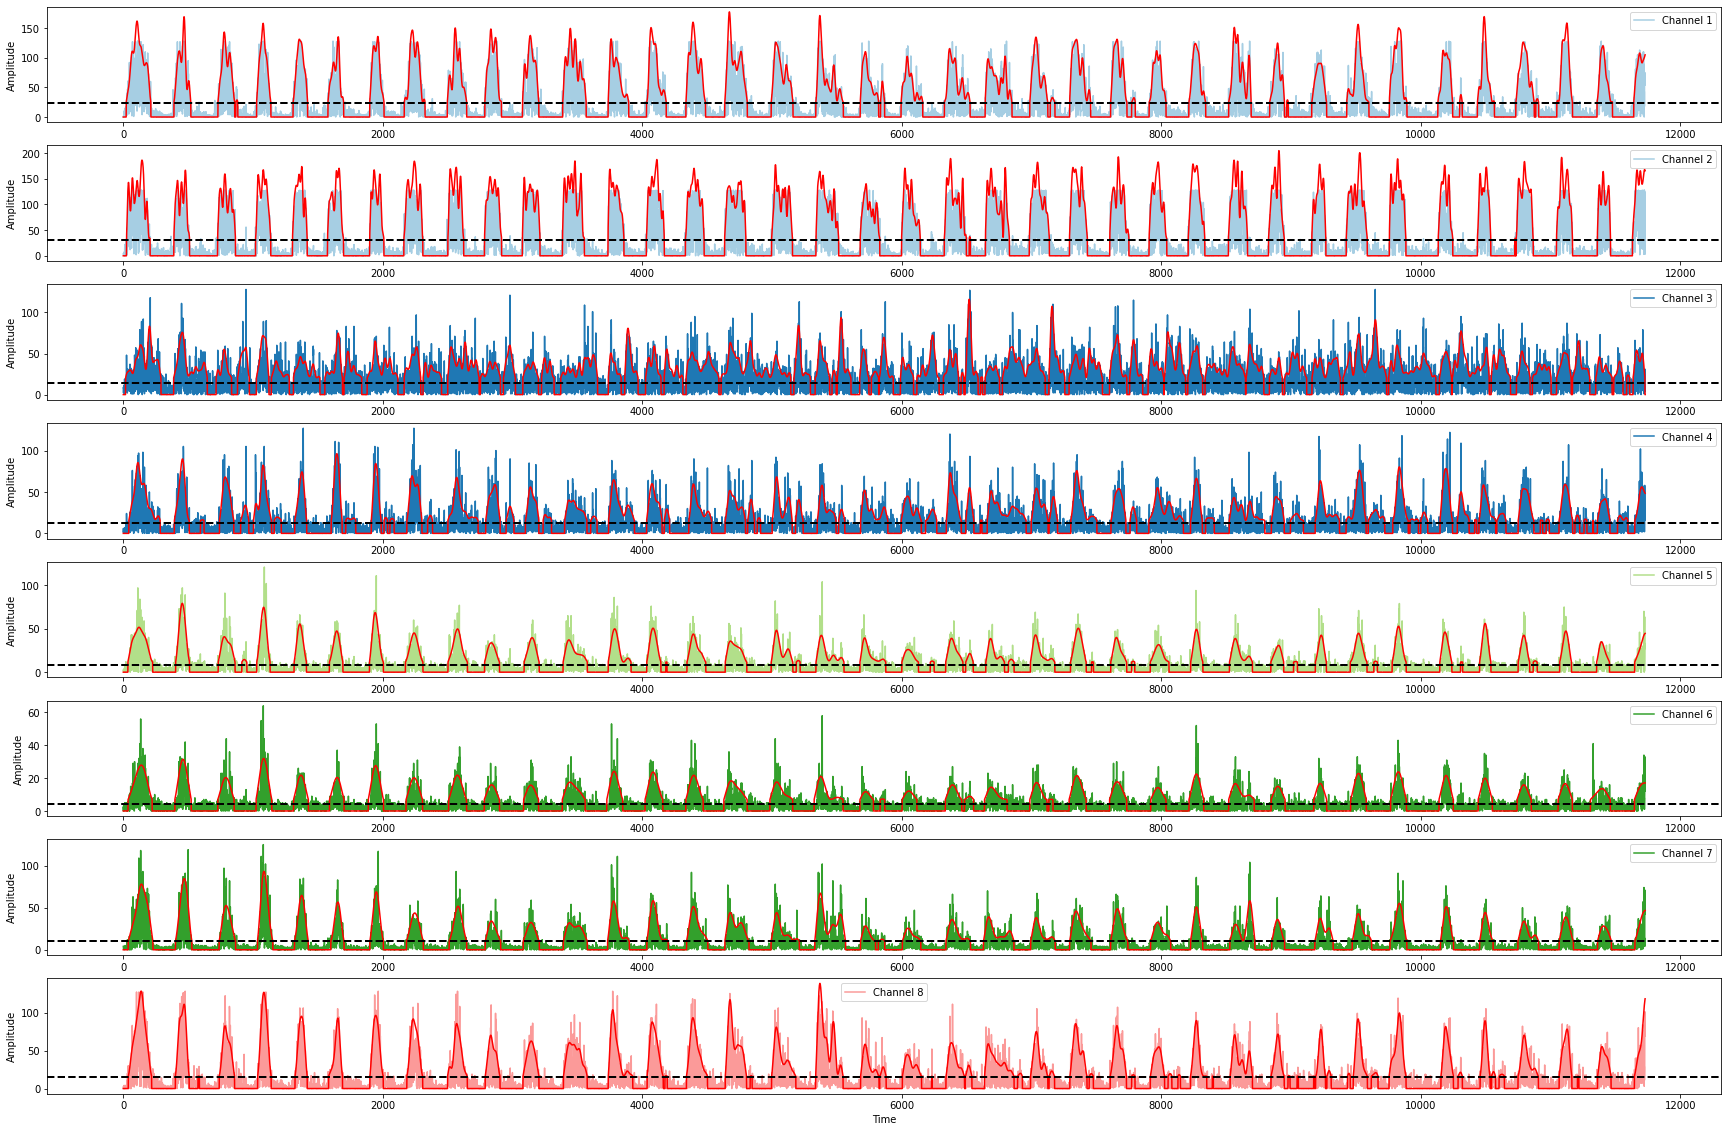

In [ ]:
signal = np.array(df)
signal_filter = lowpass_filter(signal, 200, 4)
fig, axes = plt.subplots(8, 1, figsize=(30, 20))

channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8']

for i, ax in enumerate(axes.flatten()):
    y = df.iloc[9700:, i].values
    ax.plot(y, color = plt.cm.Paired(i/20.), label = channels[i])
    y_filter = signal_filter[9700:, i]*2
    ax.plot(y_filter, color = 'r')
    ax.axhline(y=np.std(np.array(df)[:, i]), color='k',linewidth=2.0, linestyle='--') # potential threshold using std of the signal
    axes[i].set_ylabel('Amplitude')
    plt.xlabel('Time')
    axes[i].legend()
plt.show

In [ ]:
# Find Event in the signal using Threshold
def event_filter(signal):
    threshold = np.mean(np.array(signal))
    cstarts = []
    cstops = []
    signal_filter_ = signal

    # find start of event
    for i in range(1, len(signal_filter_)):
        if signal_filter_[i-1] < threshold and signal_filter_[i] >= threshold:
            cstarts.append(i)

    # find end of event
    for i in range(1, len(signal_filter_)):
        if signal_filter_[i-1] >= threshold and signal_filter_[i] < threshold:
            cstops.append(i)
    
    return cstarts, cstops

# Try Moving Avarage Filter

In [ ]:
# Use threshold to find Events (start and end) in the signal
start = []
end = []
for ch in range(8):
    start_, end_ = event_filter(signal_filter[:, ch])
    start.append(start_)
    end.append(end_)

<function matplotlib.pyplot.show(close=None, block=None)>

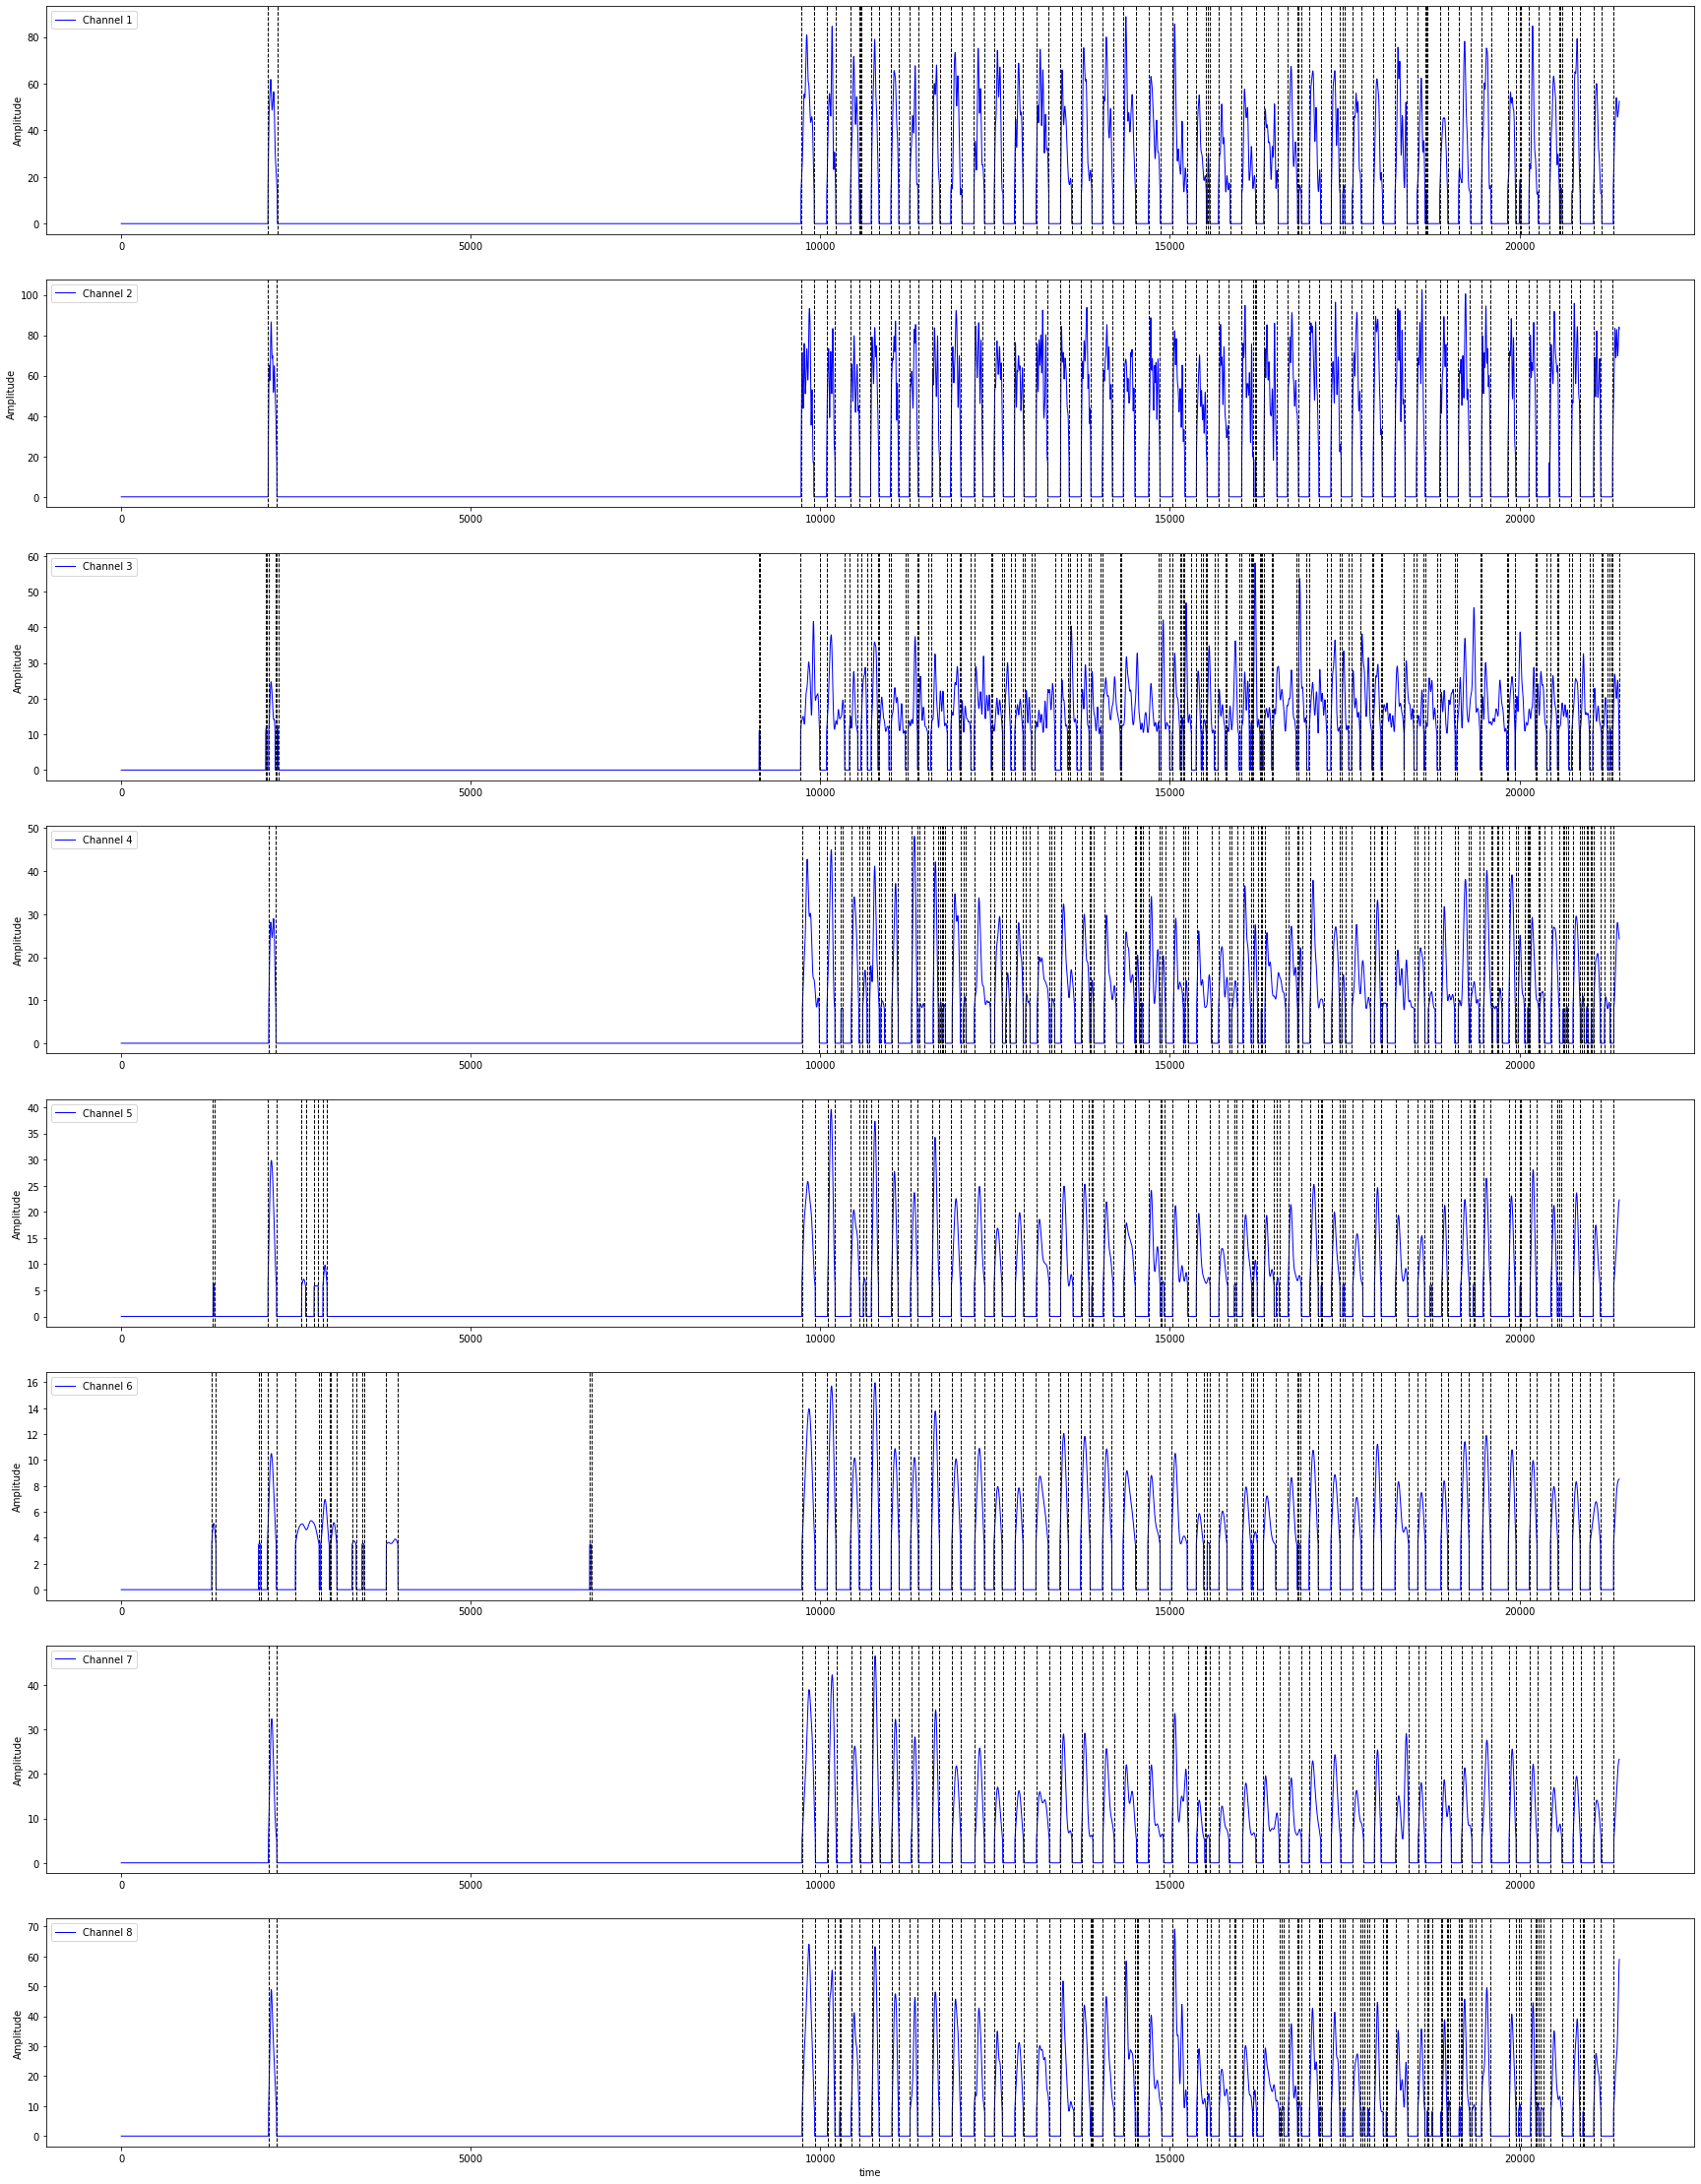

In [ ]:
# Use for 1 channel only
# plot envelope with contraction start and stop times marked by dashed lines
# start, end = threshold_filter(5, signal_filter[:, 5])
# print(start)
# print(end)
# plt.figure(figsize=(50,6))
# plt.xlabel('time')
# plt.ylabel('Amplitude')
# plt.plot(signal_filter[:, 5], 'b', linewidth=1.0)      
# for n in range(0, len(start)):
#     plt.axvline(x=start[n], color='k',linewidth=2.0, linestyle='--')
# for n in range(0, len(end)):
#     plt.axvline(x=end[n], color='k',linewidth=2.0, linestyle='--')


fig, axes = plt.subplots(8, 1, figsize=(30, 40))
channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8']

for i, ax in enumerate(axes.flatten()):
    start_ = start[i]
    end_ = end[i]
    ax.plot(signal_filter[:, i], 'b', linewidth=1.0, label = channels[i])
    for n in range(0, len(start_)):
        ax.axvline(x=start_[n], color='k',linewidth=1.0, linestyle='--')
    for n in range(0, len(end_)):
        ax.axvline(x=end_[n], color='k',linewidth=1.0, linestyle='--')
    axes[i].set_ylabel('Amplitude')
    plt.xlabel('time')
    axes[i].legend()
plt.show

In [ ]:
def masking(signal, start, end):
    signal_mask_1 = np.zeros_like(signal_filter[:, 0]) # initialize with zeros
    signal_mask_2 = np.zeros_like(signal_filter[:, 1]) # initialize with zeros

    for start_, end_ in zip(start[0], end[0]):
        if start_ and end_:
            signal_mask_1[start_:end_] = max(signal_filter[:, 0])
    
    for start_, end_ in zip(start[1], end[1]):
        if start_ and end_:
            signal_mask_2[start_:end_] = max(signal_filter[:, 1])
    
    overlapping_signal = np.logical_and(signal_mask_1, signal_mask_2)

    return overlapping_signal

In [ ]:
# check average of signal length 
# signal_clean = []
# signal_clean_ = clean_signal(signal_filter, start, end)
# for signal in signal_clean_:
#     avr_length = int(sum([len(arr) for arr in signal]) / len(signal))
#     print(f'Signal Sequence: {len(signal)}')
#     signal_ = []
#     for amp in signal:
#         # print(f'Signal Length: {len(amp)}')
#         if len(amp) > avr_length:
#             # print(f'Signal Length Arr: {len(amp)}')
#             signal_.append(amp)
#     signal_clean.append(signal_)

# for signal in signal_clean:
#     print(np.shape(signal))

################################################################################
# Check if wave is in every channel    
print(f'Oroginal Signal: {signal_filter[:, 0]}')
print(f'Channel 1: {len(start[0])}')
print(f'Channel 1: {len(end[0])}')

signal_masking = masking(signal_filter, start, end)

Oroginal Signal: [ 0.          0.          0.         ... 51.66437418 52.0590435
 52.44620576]
Channel 1: 46
Channel 1: 45


<function matplotlib.pyplot.show(close=None, block=None)>

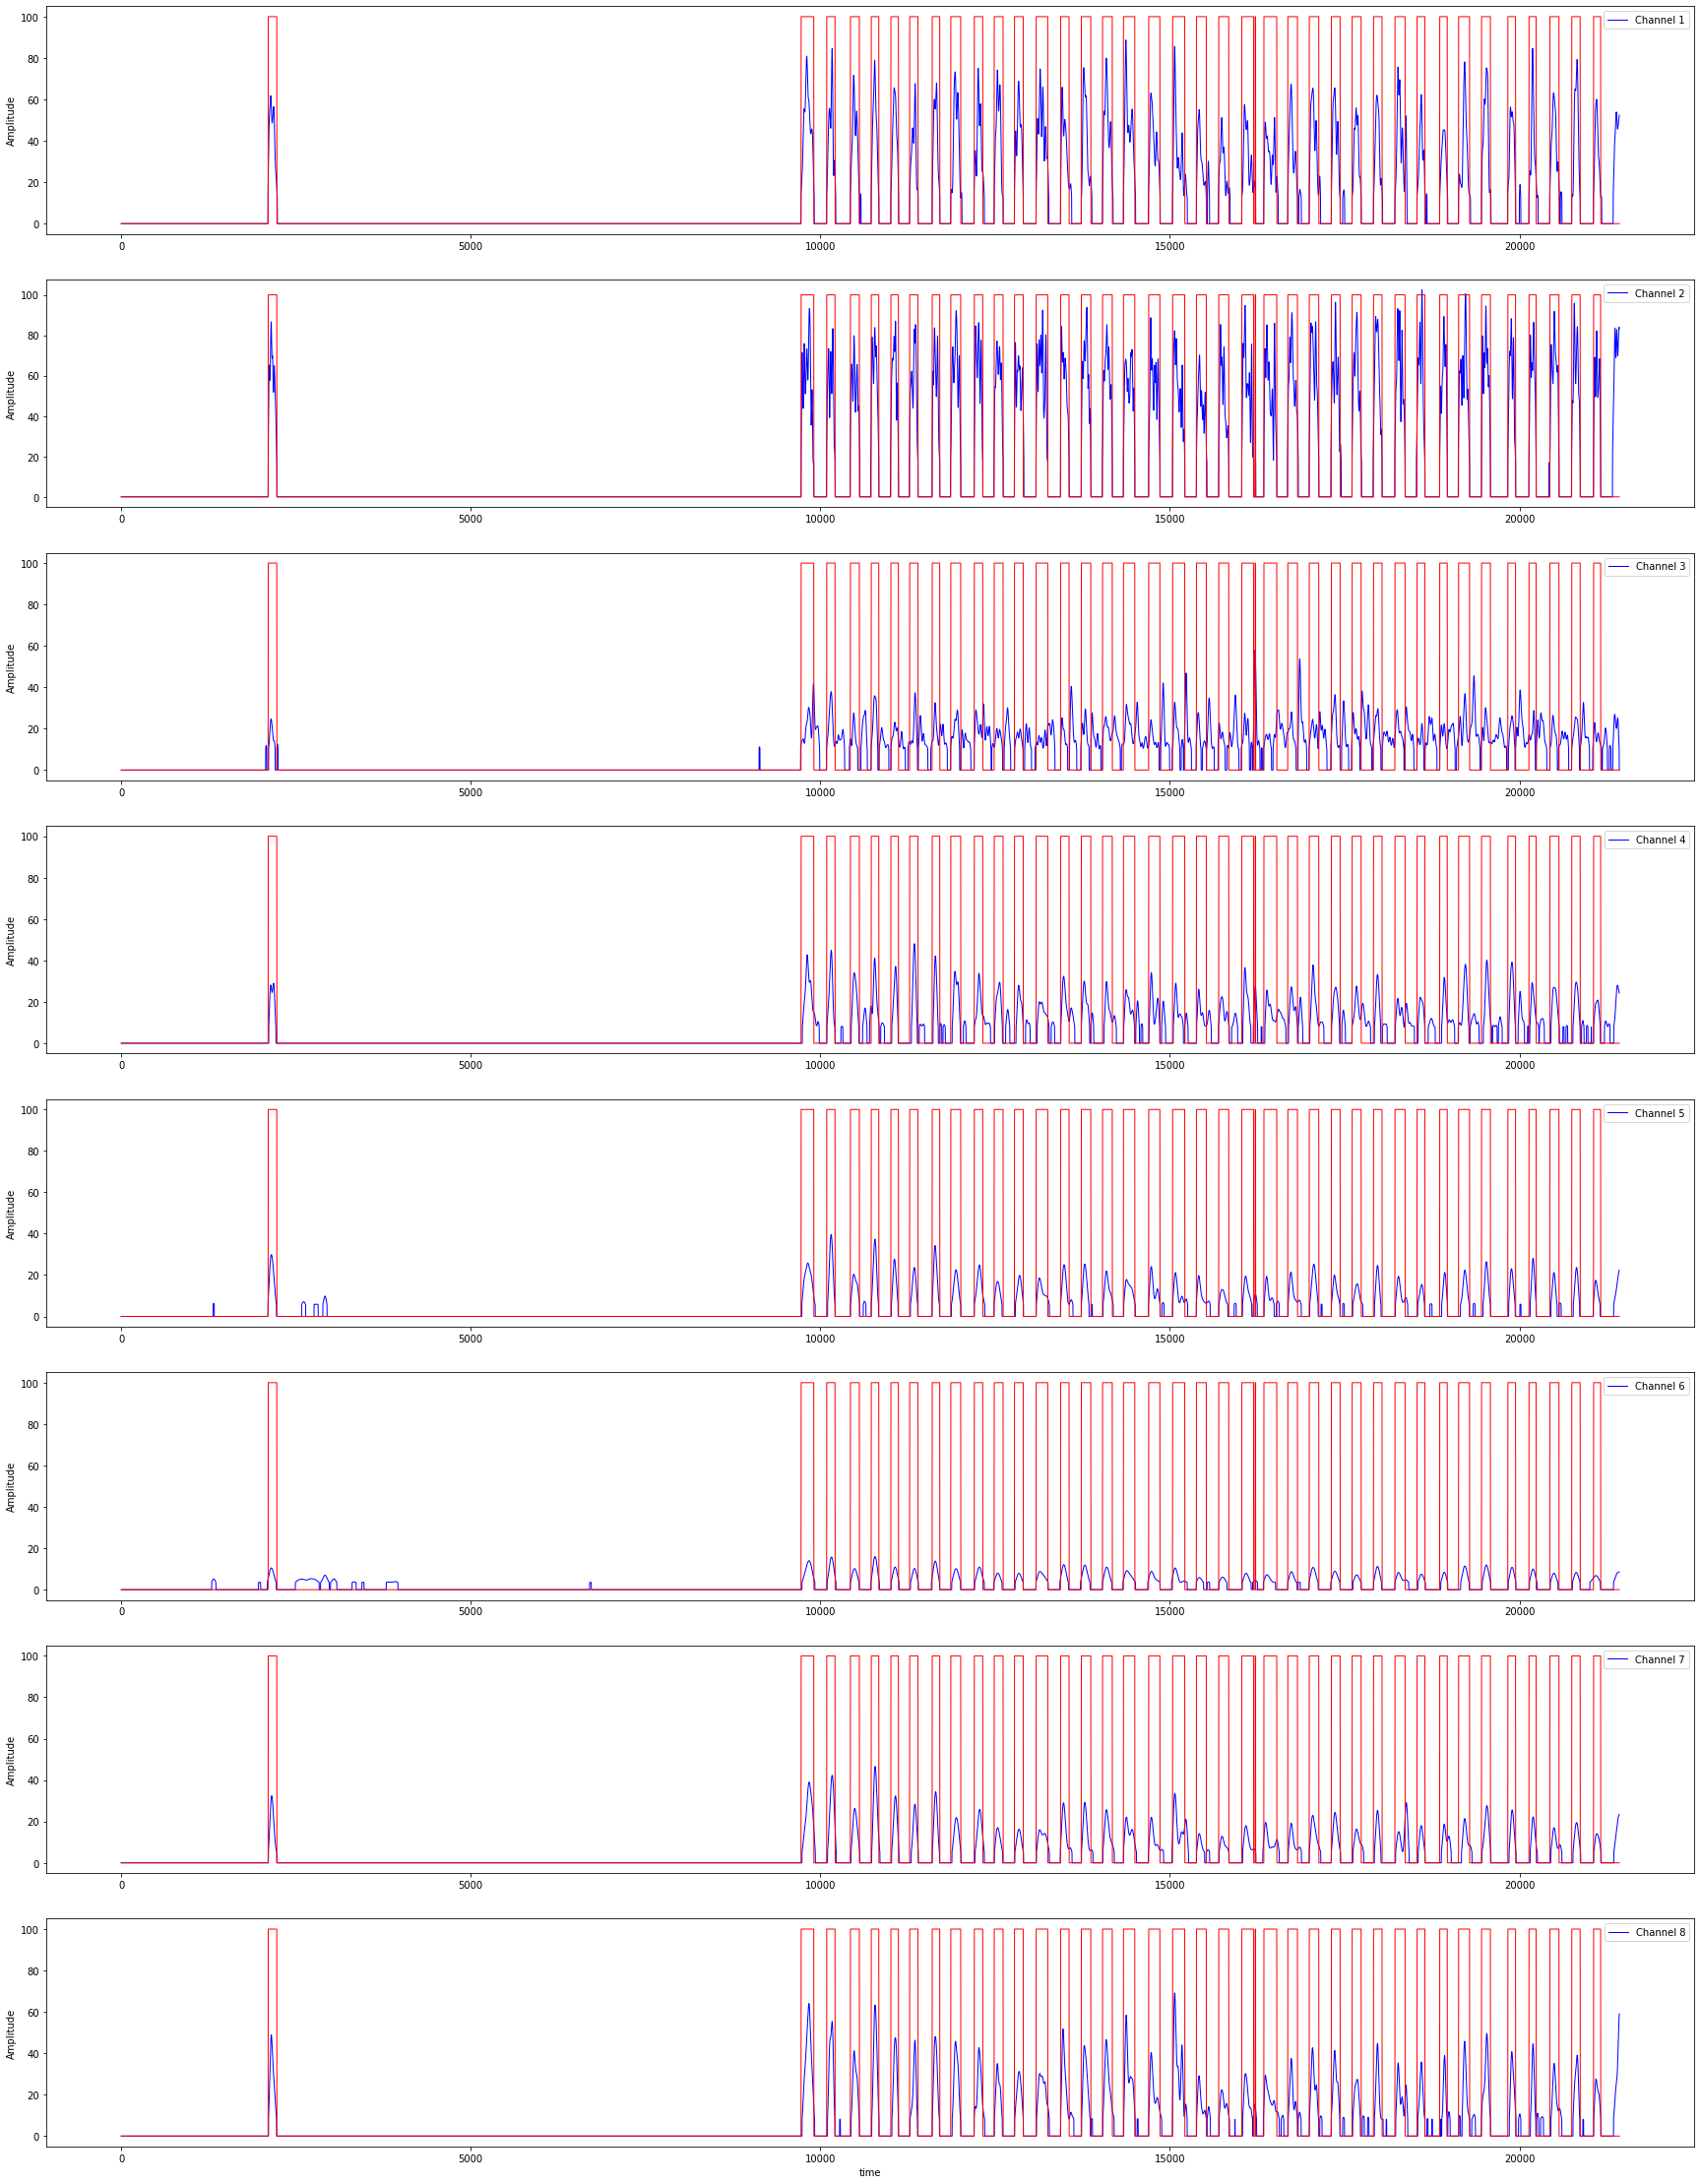

In [ ]:
# Plot with Filtered Signal
fig, axes = plt.subplots(8, 1, figsize=(30, 40))
channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8']

for i, ax in enumerate(axes.flatten()):
    ax.plot(signal_filter[:, i], 'b', linewidth=1.0, label = channels[i])
    ax.plot(signal_masking*100, 'r', linewidth=1.0)
    axes[i].set_ylabel('Amplitude')
    plt.xlabel('time')
    axes[i].legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

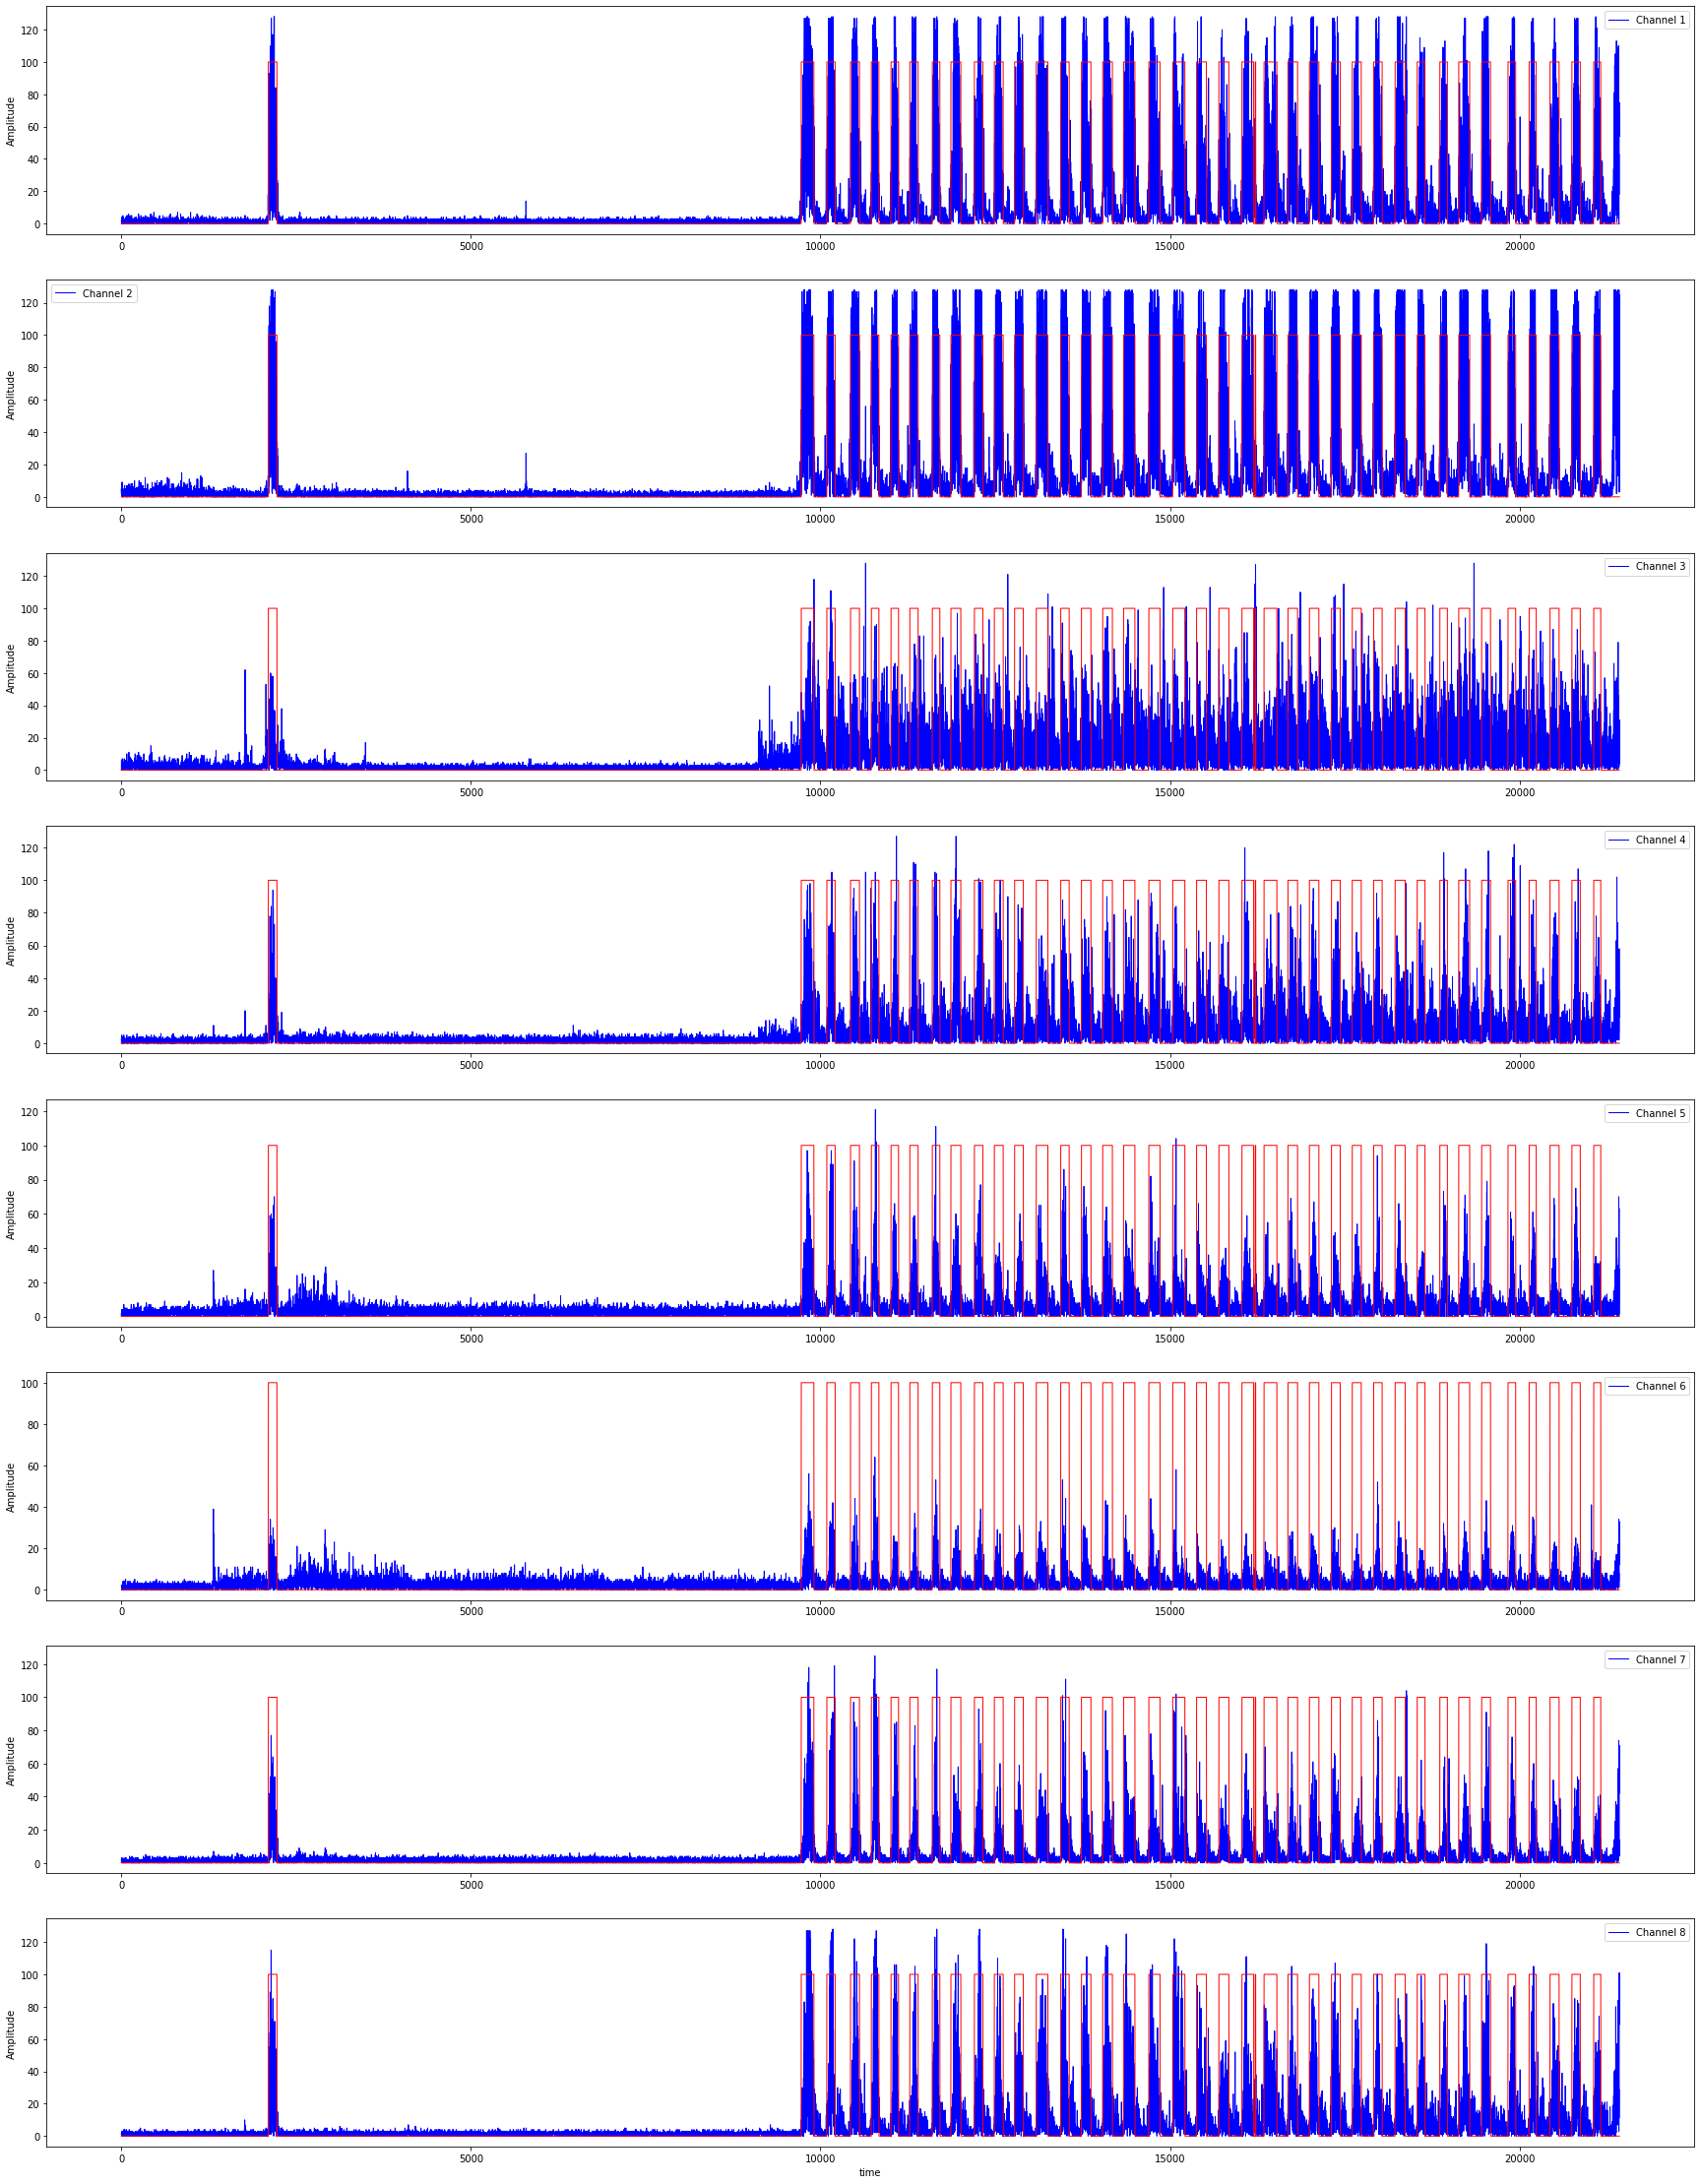

In [ ]:
# Plot with Original Signal
fig, axes = plt.subplots(8, 1, figsize=(30, 40))
channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8']

for i, ax in enumerate(axes.flatten()):
    ax.plot(signal[:, i], 'b', linewidth=1.0, label = channels[i])
    ax.plot(signal_masking*100, 'r', linewidth=1.0)
    axes[i].set_ylabel('Amplitude')
    plt.xlabel('time')
    axes[i].legend()
plt.show

In [ ]:
range_ = []
final_ = []
signal_ = signal[:, 0]
for i in range(len(signal_masking)):
    if signal_masking[i] == True:
        range_.append(signal_[i])
    else:
        if(signal_masking[i-1] == True):
            final_.append(range_)
            range_ = []
        continue
print(len(final_))

39


In [ ]:
def clean_signal(signals, signal_masking):
    signal_clean = []
    for ch in range(8):
        signal_ = np.array(signals[:, ch])
        signal_clean_ = []
        range_ = []
        # print(f'Signal: {signal_.shape}, Masking: {signal_masking.shape}')

        for i in range(len(signal_masking)):
            if signal_masking[i] == True:
                range_.append(signal_[i])
            else:
                if(signal_masking[i-1] == True):
                    signal_clean_.append(range_)
                    range_ = []
                continue
        
        # Delete if Length <= 100 (0.5 seconds)
        signal_clean_ = [signal for signal in signal_clean_ if len(signal) >= 100]
        signal_clean.append(signal_clean_)
    return np.array(signal_clean).transpose()

<ipython-input-50-4ad5d1c97e97>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(signal_clean).transpose()


<function matplotlib.pyplot.show(close=None, block=None)>

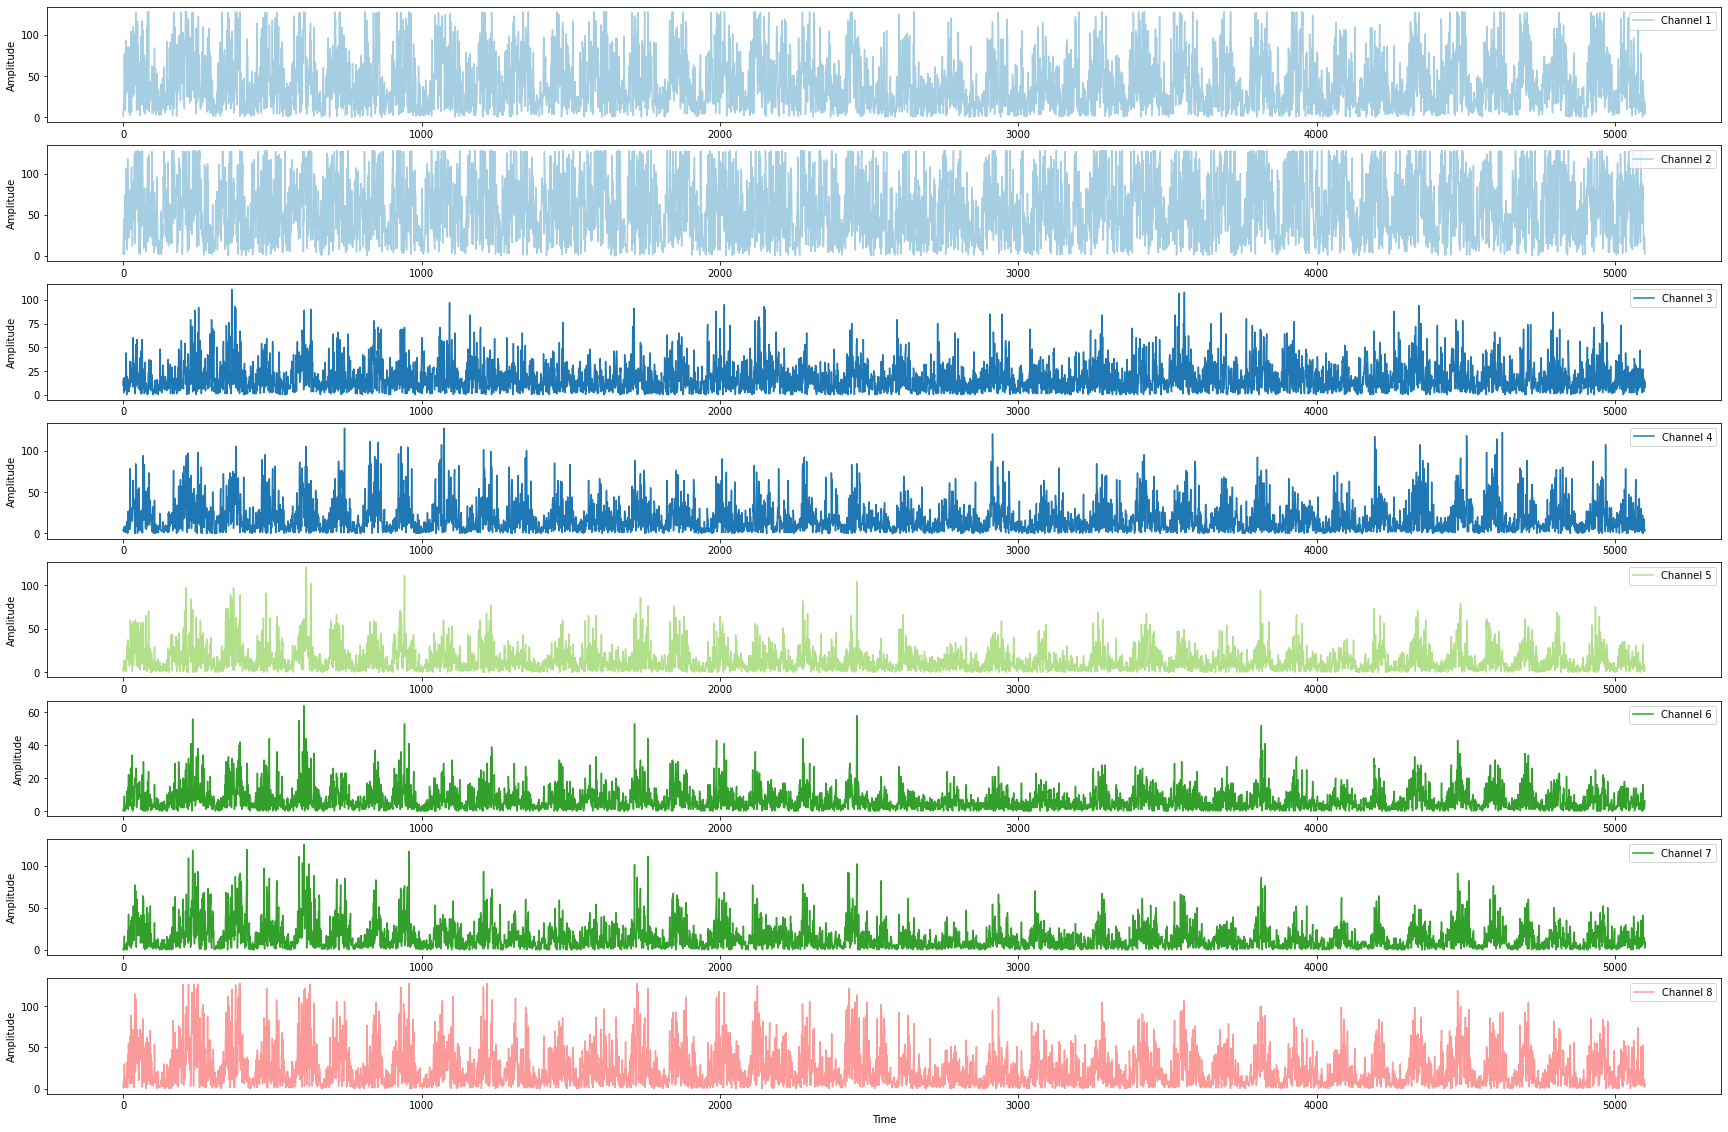

In [ ]:
# The output is channel x times X amplitude
# signal_clean = clean_signal(signal_filter, signal_masking)
signal_clean = clean_signal(signal, signal_masking)

# signal_filter = np.array(signal_filter).transpose()
fig, axes = plt.subplots(8, 1, figsize=(30, 20))

channels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8']

for i, ax in enumerate(axes.flatten()):
    y = np.concatenate(signal_clean[:,i])
    # y = df.iloc[9700:11700, i].values
    ax.plot(y, color = plt.cm.Paired(i/20.), label = channels[i])
    # y_filter = signal_filter[9700:11700, i]
    # ax.plot(y_filter, color = 'r')
    # ax.axhline(y=np.std(np.array(df)[:, i]), color='k',linewidth=2.0, linestyle='--') # potential threshold using std of the signal
    axes[i].set_ylabel('Amplitude')
    plt.xlabel('Time')
    axes[i].legend()
plt.show

In [ ]:
print(f'Signal Length: {signal_clean.shape}')

for ch in range(8):
    print(f'Signal Channel {ch} Length: {signal_clean[:, ch].shape}')
    for gs in signal_clean[:, ch]:
        print(np.shape(gs))

Signal Length: (38, 8)
Signal Channel 0 Length: (38,)
(124,)
(182,)
(120,)
(129,)
(109,)
(109,)
(120,)
(109,)
(143,)
(122,)
(128,)
(126,)
(167,)
(122,)
(137,)
(140,)
(163,)
(161,)
(175,)
(142,)
(144,)
(169,)
(185,)
(139,)
(137,)
(126,)
(130,)
(123,)
(145,)
(113,)
(109,)
(158,)
(128,)
(111,)
(103,)
(131,)
(121,)
(102,)
Signal Channel 1 Length: (38,)
(124,)
(182,)
(120,)
(129,)
(109,)
(109,)
(120,)
(109,)
(143,)
(122,)
(128,)
(126,)
(167,)
(122,)
(137,)
(140,)
(163,)
(161,)
(175,)
(142,)
(144,)
(169,)
(185,)
(139,)
(137,)
(126,)
(130,)
(123,)
(145,)
(113,)
(109,)
(158,)
(128,)
(111,)
(103,)
(131,)
(121,)
(102,)
Signal Channel 2 Length: (38,)
(124,)
(182,)
(120,)
(129,)
(109,)
(109,)
(120,)
(109,)
(143,)
(122,)
(128,)
(126,)
(167,)
(122,)
(137,)
(140,)
(163,)
(161,)
(175,)
(142,)
(144,)
(169,)
(185,)
(139,)
(137,)
(126,)
(130,)
(123,)
(145,)
(113,)
(109,)
(158,)
(128,)
(111,)
(103,)
(131,)
(121,)
(102,)
Signal Channel 3 Length: (38,)
(124,)
(182,)
(120,)
(129,)
(109,)
(109,)
(120,)
(109,)

In [ ]:
# signal_filter = all the signal
# start = start of the event
# end = end of the event
print(signal_filter[:, 0])
print(start[0])
print(end[0])


signal_filter_ = np.array(signal_filter[:, 0])
start_ = np.array(start[0])
end_ = np.array(end[0])
print(f'Signal: {signal_filter_.shape}, Start: {start_.shape}, End: {end_.shape}')

signal_clean = []
for i in range(len(start_)):
    if (i < len(start_)) and (i < len(end_)):
        signal_clean.append(signal_filter_[start_[i]:end_[i]])

In [ ]:
signal_clean_ = np.concatenate(signal_clean)
print(signal_clean_.shape)
plt.figure(figsize=(50,6))
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.plot(signal_clean_, 'b', linewidth=1.0)      

In [ ]:
window_signal = []
window_signal_pad = []
window_size = 200       # 1-second signal

for window in np.array_split(df, (len(df)/window_size)):
    window_signal.append(window)

max_length = np.max([w.shape[0] for w in window_signal])
print(f'Max: {max_length}')

for window in window_signal:
    if len(window) < max_length:
        window = np.pad(window, [(0, 1), (0, 0)], mode='constant')
        window_signal_pad.append(window)
    
np.shape(window_signal_pad)

In [ ]:
def shannon(x):
    y = np.power(x, 2)
    y1 = np.sum(y)
    PE = y/y1
    SE = np.sum(PE * np.log(np.power(PE, 2)))

    return SE

def logenergy(x):
    y = np.power(x, 2)
    y1 = np.sum(y)
    PE = y/y1
    LEE =np.sum(PE * np.log(PE))

    return LEE

In [ ]:
# Statistical Feature: min, max, arithmatix mean, median, sum, standar deviation, variance, root menskuare value, Skewness, Kurtosis, Shannon entropy, and log energy entropy
window_signal_pad = np.array(window_signal_pad)
stat_channel = []

print(window_signal_pad.shape)
for window in window_signal_pad:
    # print(window.shape)
    stat = []
    for x in window.transpose():
        stat.append(np.min(x))
        stat.append(np.max(x))
        stat.append(np.mean(x))
        stat.append(np.median(x))
        stat.append(np.sum(x))
        stat.append(st.stdev(x))
        stat.append(st.variance(x))
        stat.append(scst.skew(x))
        stat.append(scst.kurtosis(x))
        stat.append(shannon(x))
        stat.append(logenergy(x))
    stat_channel.append(np.array(stat).flatten())
print(np.shape(stat_channel))